# Create a circuit to generate any two-qubit quantum state in Qiskit

Build a general 2-qubit circuit that could output all Hilbert space of states by tuning its parameters.

In [1]:
from qiskit import *
import numpy as np

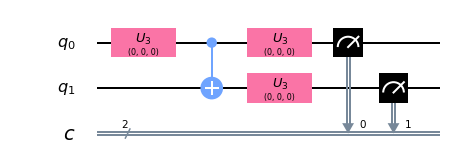

In [2]:
def state_maker(theta, ang0, ang1):
    circ = QuantumCircuit(2,2)

    circ.u3(theta, 0, 0, 0)
    circ.cx(0, 1)
    circ.u3(*ang1, 1)
    circ.u3(*ang0, 0)
    return circ

def get_ensemble(theta0, theta1, theta2, N=1024):
    circuit = state_maker(theta0, [theta1,0,0], [theta2,0,0])
    
    circuit.measure(0,0)
    circuit.measure(1,1)
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator, shots = N).result()
    counts = result.get_counts()
    return counts

from qiskit.tools.visualization import plot_histogram

#angi = [theta, phi, lam]
ang0 = [0,0,0]
ang1 = [0,0,0]
theta = 0

circ = state_maker(theta, ang0, ang1)

%matplotlib inline
#circ.draw(output='mpl')
circ.measure(0,0)
circ.measure(1,1)

circ.draw(output='mpl')

Example of the count result for some parameters $\theta_0$, $\theta_1$ and $\theta_2$.

{'00': 589, '01': 194, '10': 175, '11': 66}


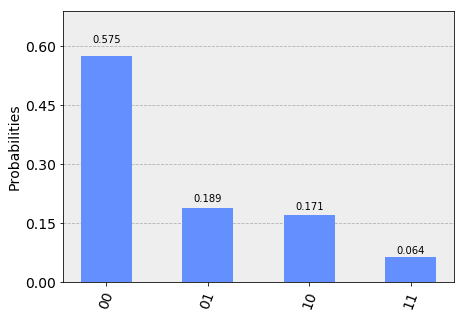

In [8]:
theta0, theta1, theta2 = 0.000, 1.037, 1.066
counts = get_ensemble(theta0, theta1, theta2)
print(counts)
plot_histogram(counts)

Example of the generated state result for some parameters $\theta_0$, $\theta_1$ and $\theta_2$.

In [4]:
circ = state_maker(theta0, [theta1, 0, 0], [theta2, 0, 0])
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


# For some $\theta$'s
Plot the probability of measuring each state for a given set of parameters.

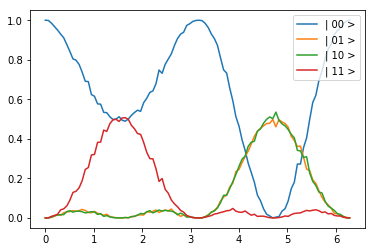

In [5]:
ntheta = 100
N = 1024

theta = np.linspace(0, 2*np.pi, ntheta)

prob00, prob01, prob10, prob11 = [], [], [], []

for t in theta: # to check it we only change one parameter
    counts = get_ensemble(t, t, t, N)
    prob00.append(counts['00']/N if '00' in counts.keys() else 0)
    prob01.append(counts['01']/N if '01' in counts.keys() else 0)
    prob10.append(counts['10']/N if '10' in counts.keys() else 0)
    prob11.append(counts['11']/N if '11' in counts.keys() else 0)

import matplotlib.pyplot as plt
plt.plot(theta, prob00, label='| 00 >')
plt.plot(theta, prob01, label='| 01 >')
plt.plot(theta, prob10, label='| 10 >')
plt.plot(theta, prob11, label='| 11 >')
plt.legend(loc = 'upper right')

plt.show()

# Measuring the 'entanglement'
We measure the realtion between the amplidudes of states $| 00 >$ and $| 01 >$ for different $\theta_0$'s.

theta = 0.44pi 
state =  [0.76604444+0.j 0.        +0.j 0.        +0.j 0.64278761+0.j]

theta = 0.67pi 
state =  [0.5      +0.j 0.       +0.j 0.       +0.j 0.8660254+0.j]

theta = 0.89pi 
state =  [0.17364818+0.j 0.        +0.j 0.        +0.j 0.98480775+0.j]

theta = 1.11pi 
state =  [-0.17364818+0.j  0.        +0.j  0.        +0.j  0.98480775+0.j]

theta = 1.33pi 
state =  [-0.5      +0.j  0.       +0.j  0.       +0.j  0.8660254+0.j]

theta = 1.56pi 
state =  [-0.76604444+0.j  0.        +0.j  0.        +0.j  0.64278761+0.j]



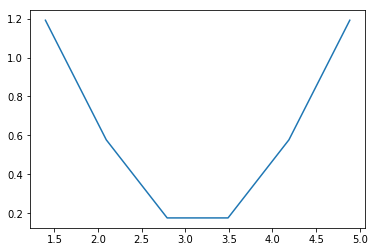

In [6]:
import matplotlib.pyplot as plt

ang0 = [0,0,0]
ang1 = [0,0,0]

entang = []
e00 = []
e11 = []
thetas = np.linspace(0, 2*np.pi, 10)
thetas = thetas[2:-2]
for theta in thetas:
    circ = state_maker(theta, ang0, ang1)
    
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circ, backend = simulator).result()
    statevector = result.get_statevector()
        
    print('theta = {:2.2f}pi '.format(theta/np.pi) )
    print('state = ', statevector)
    print() 
    entang.append(abs(statevector[0])/(abs(statevector[3])+.0001))

plt.plot(thetas, entang)